# 🏃‍♂️ BTN Jakarta Marathon 2025 - Data Analysis

Analisis ini bertujuan untuk mengeksplorasi data peserta lomba BTN Jakarta International Marathon 2025.  
Fokus utama: distribusi peserta, performa berdasarkan kategori, usia, dan gender.

---

# 🎯 Tujuan Analisis
- Mengetahui jumlah peserta per kategori (10K, HM, FM)
- Analisis waktu tempuh rata-rata
- Perbandingan performa pria dan wanita
- Insight untuk perencanaan lomba tahun depan



In [6]:
# 📚 Load library
library(tidyverse)

# 📂 Import data (ganti path sesuai dataset yang kamu pakai)
data <- read.csv("/kaggle/input/btn-jakarta-intl-marathon-2025/Result Jakim 2025.csv")

# 🧐 Lihat struktur data
str(data)

# 🔍 Lihat beberapa baris awal
head(data)


'data.frame':	30116 obs. of  10 variables:
 $ No      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ BIB     : chr  "50068" "61562" "61561" "50069" ...
 $ Name    : chr  "Pandu sukarya" "Daniel Simanjuntak" "Sedilta pilon Nubatonis" "Pandu Winata" ...
 $ Gender  : chr  "Male" "Male" "Male" "Male" ...
 $ Distance: chr  "10K" "10K" "10K" "10K" ...
 $ Category: chr  "National" "National" "National" "National" ...
 $ GunTime : chr  "0:31:38" "0:32:28" "0:33:36" "0:34:10" ...
 $ NetTime : chr  "0:31:35" "0:32:24" "0:33:33" "0:34:06" ...
 $ Status  : chr  "Finished" "Finished" "Finished" "Finished" ...
 $ X       : logi  NA NA NA NA NA NA ...


,No,BIB,Name,Gender,Distance,Category,GunTime,NetTime,Status,X
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,1,50068,Pandu sukarya,Male,10K,National,0:31:38,0:31:35,Finished,NA
2,2,61562,Daniel Simanjuntak,Male,10K,National,0:32:28,0:32:24,Finished,NA
3,3,61561,Sedilta pilon Nubatonis,Male,10K,National,0:33:36,0:33:33,Finished,NA
4,4,50069,Pandu Winata,Male,10K,National,0:34:10,0:34:06,Finished,NA
5,5,62563,Runner - 62563,Male,10K,National,0:34:16,1:34:01,Finished,NA
6,6,61192,Abdul Haris,Male,10K,Master National A,0:35:50,0:35:46,Finished,NA


# Cleaning Data dan Rubah Kolom Waktu (GunTime & NetTime)

In [ ]:
#Cleaning Data (hapus kolom X/kolom yang tidak perlu)
data <- data %>% select(-X)

In [12]:
library(lubridate)

# Ubah string waktu ke format waktu (lubridate::hms)
data <- data %>%
  mutate(
    GunTimeSec = period_to_seconds(hms(GunTime)),
    NetTimeSec = period_to_seconds(hms(NetTime)),
    GunTimeMin = GunTimeSec / 60,
    NetTimeMin = NetTimeSec / 60
  )


Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `GunTimeSec = period_to_seconds(hms(GunTime))`.
Caused by warning in `.parse_hms()`:
! Some strings failed to parse
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


# Analisa Jumlah Peserta per Kategori (10K, HM, FM)

In [23]:
# Tabel jumlah peserta per kategori lomba
library(knitr)

data %>%
  count(Distance, sort = TRUE) %>%
  rename(`Kategori Lomba` = Distance, `Jumlah Peserta` = n) %>%
  kable(caption = "Tabel: Jumlah Peserta per Kategori Jarak Lomba")




Table: Tabel: Jumlah Peserta per Kategori Jarak Lomba

|Kategori Lomba | Jumlah Peserta|
|:--------------|--------------:|
|10K            |          14405|
|Half Marathon  |          11673|
|Marathon       |           4038|

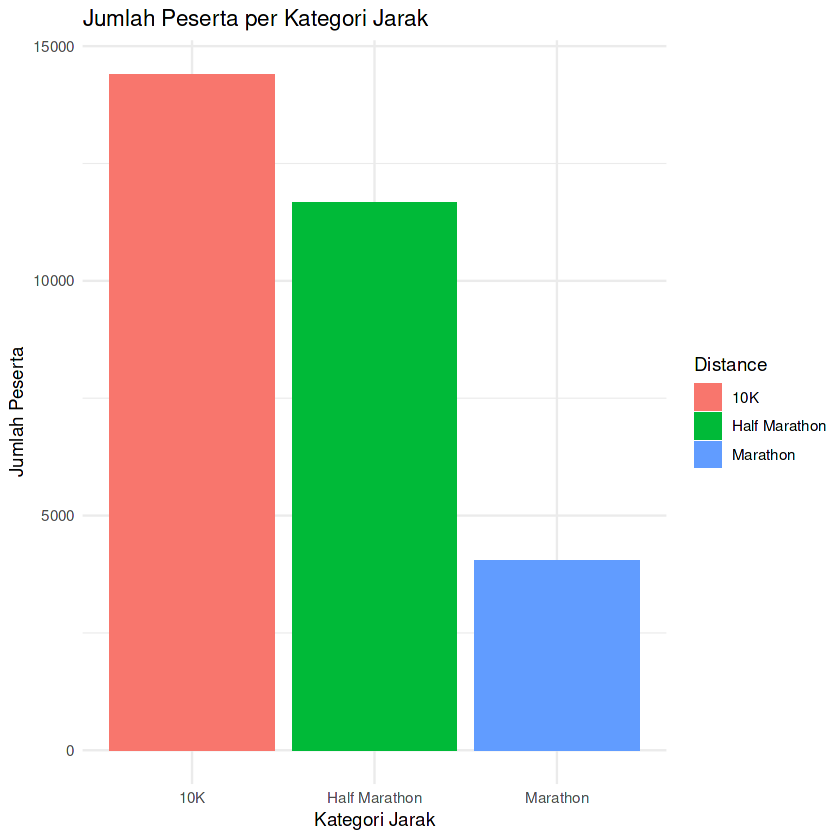

In [17]:
library(ggplot2)
library(dplyr)

# Hitung jumlah peserta tiap kategori Distance
data %>%
  count(Distance) %>%
  ggplot(aes(x = Distance, y = n, fill = Distance)) +
  geom_col() +
  labs(title = "Jumlah Peserta per Kategori Jarak",
       x = "Kategori Jarak",
       y = "Jumlah Peserta") +
  theme_minimal()


### 📊 Jumlah Peserta per Kategori

Grafik berikut menampilkan distribusi peserta berdasarkan kategori lomba: 10K, Half Marathon (21K), dan Full Marathon (42K).

- Kategori **10K** mendominasi jumlah peserta sebanyak 14405 peserta.
- Kategori **Half dan Full Marathon** memiliki jumlah peserta lebih sedikit, menunjukkan segmentasi pelari yang lebih terlatih.


# Analisis Waktu Tempuh Rata-rata

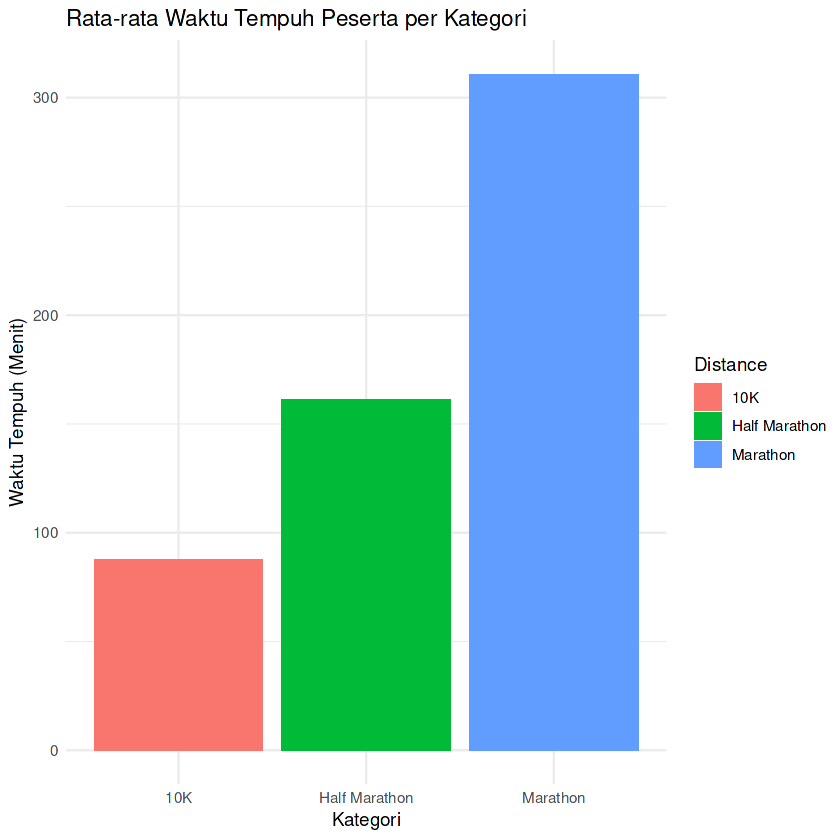

In [18]:
# Hitung rata-rata NetTime per kategori
data %>%
  group_by(Distance) %>%
  summarise(Rata2_Menit = mean(NetTimeMin, na.rm = TRUE)) %>%
  ggplot(aes(x = Distance, y = Rata2_Menit, fill = Distance)) +
  geom_col() +
  labs(title = "Rata-rata Waktu Tempuh Peserta per Kategori",
       x = "Kategori",
       y = "Waktu Tempuh (Menit)") +
  theme_minimal()


### ⏱️ Rata-rata Waktu Tempuh per Kategori

Rata-rata waktu tempuh meningkat seiring dengan panjang jarak lomba:

- **10K**: waktu tempuh rata-rata tercepat.
- **21K & 42K**: meningkat tajam, sejalan dengan tingkat kesulitan dan ketahanan fisik.

Data ini berguna untuk menentukan estimasi waktu lomba dan logistik acara.


# ⚖️ Visualisasi Performa Pria vs Wanita per Jarak

`summarise()` has grouped output by 'Distance'. You can override using the
`.groups` argument.


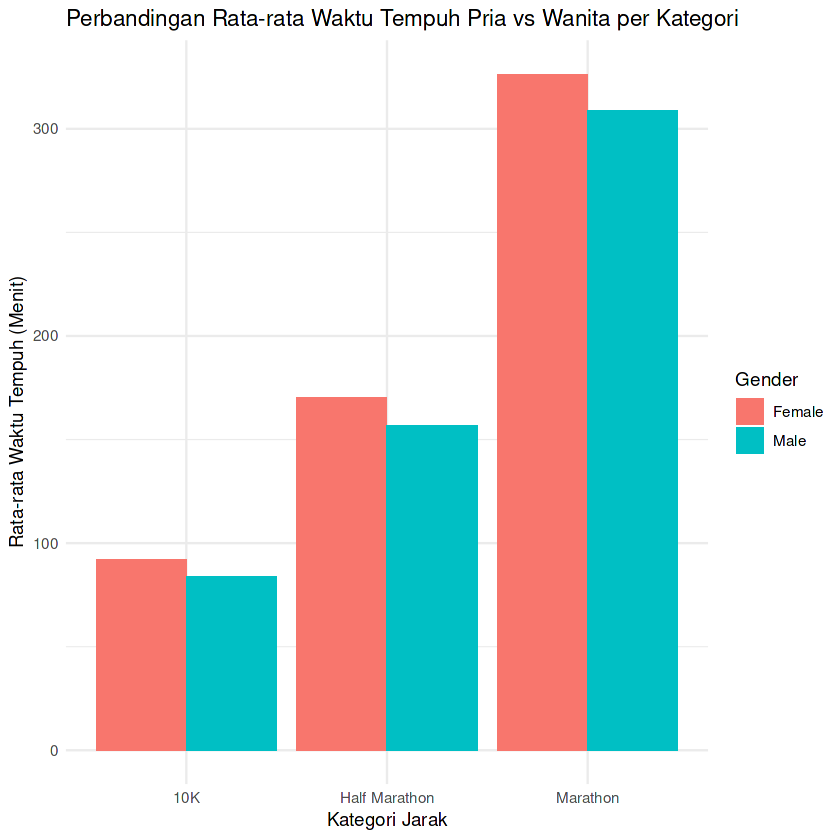

In [21]:
# Rata-rata NetTime per Gender dan Distance
data %>%
  group_by(Distance, Gender) %>%
  summarise(Rata2_Menit = mean(NetTimeMin, na.rm = TRUE)) %>%
  ggplot(aes(x = Distance, y = Rata2_Menit, fill = Gender)) +
  geom_col(position = "dodge") +
  labs(
    title = "Perbandingan Rata-rata Waktu Tempuh Pria vs Wanita per Kategori",
    x = "Kategori Jarak",
    y = "Rata-rata Waktu Tempuh (Menit)",
    fill = "Gender"
  ) +
  theme_minimal()


### ⚖️ Perbandingan Performa Pria dan Wanita per Kategori

Grafik ini menunjukkan rata-rata waktu tempuh pria dan wanita untuk masing-masing kategori lomba (10K, 21K, dan 42K):

- Di semua kategori, **peserta pria cenderung menyelesaikan lomba lebih cepat** dari wanita.
- Perbedaan performa paling mencolok tampak di kategori **Full Marathon (42K)**.
- Informasi ini berguna untuk:
  - Menentukan pengelompokan peserta saat start
  - Menyesuaikan pace group
  - Membuat simulasi waktu selesai lomba per kelompok

🎯 Perbandingan berdasarkan kategori lebih adil daripada hanya agregat gender secara umum.


# 🧠 Insight dan Rekomendasi

- Kategori **10K** paling diminati dan dapat diprioritaskan dalam hal logistik.
- **Rata-rata waktu tempuh meningkat signifikan di kategori 21K dan 42K**, menunjukkan tantangan fisik yang lebih tinggi.
- **Peserta pria** secara umum memiliki waktu tempuh lebih cepat dibanding wanita.
- Rekomendasi: tahun depan, pertimbangkan:
  - Penambahan slot untuk 10K karena tingginya minat
  - Fasilitas pace group per gender/usia
  - Penggunaan data historis ini untuk simulasi estimasi waktu penutupan rute

Analisis ini diharapkan menjadi dasar perbaikan lomba tahun-tahun berikutnya.
